# Boosting Implementation

This assignment will have us develop a gradient boosted regressor using Decision Tree models from `sklearn`, to help us understand the how the algorithm works.

## Basic
### Part 1: Implement basic boosting model

Write code (in `src/boosting.py`) to implement a gradient-boosted regressor.

> We're including the intermediate code in this solutions notebook so you can see each stage, though best practice is to write most code directly in `.py` files (other than EDA and figuring things out).

1. Load the boston data set into a notebook and do a train-test split. Import the existing stub class. Instantiate it and fit and predict on the data, confirming it does what you expect (i.e., nothing). After each subsequent step, fit and predict on the results, and verify you are getting the results you expect.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
data = load_boston()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [4]:
model = GradientBoostedRegressor()
model.fit(X_train, y_train)
print(model.predict(X_test))

None


2. Implement the `__init__` method, for now adding `n_estimators` and `learning_rate` as the only other parameters. Set matching attributes, and an attribute (a list) with the estimators.

In [5]:
class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [6]:
model = GradientBoostedRegressor()
print(model.n_estimators, model.learning_rate, model.estimators)

100 0.1 []


3. Begin implementing the `fit` method, creating just the first estimator and add it to the list. The first estimator should predict the mean of the y values used to fit it (you can use `DummyRegressor`).

In [7]:
from sklearn.dummy import DummyRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)

    def predict(self, X):
        pass

In [8]:
model = GradientBoostedRegressor()
model.fit(X_train, y_train)
model.estimators

[DummyRegressor(constant=None, quantile=None, strategy='mean')]

4. Implement the `predict` method. It should return the total prediction of all the estimators (even though right now you only have one).

In [9]:
import numpy as np
from sklearn.dummy import DummyRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

In [10]:
model = GradientBoostedRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

array([22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182058,
       22.8182058, 22.8182058, 22.8182058, 22.8182058, 22.8182

5. Finish the `fit` method. After creating the first estimator, do `self.n_estimators` times:
    a. Predict on the training data over the previous estimators,
    b. Subtract those predictions from the training targets, and multiply by the learning rate,
    c. Create a new estimator (using a `DecisionTreeRegressor` from `sklearn`) using the above as a target, and
    d. Append the estimator to the list.

In [11]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)
        
        # NB: it would be easier to call the predict method
        # of this model and avoid duplicated code, but that
        # adds a O(n**2) term in the number of estimators
        # because earlier estimators are called multiple
        # times during fitting
        prediction = np.zeros(len(y))
        for i in range(self.n_estimators):
            prediction = prediction + self.estimators[i].predict(X)
            
            target = self.learning_rate * (y - prediction)
            estimator = DecisionTreeRegressor()
            estimator.fit(X, target)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

In [12]:
model = GradientBoostedRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

array([24.28986559, 22.51815099,  9.10908478, 48.78624493, 18.69458655,
       16.85091524, 21.51440237, 17.74244793, 10.34344723, 22.46063913,
       49.99224709, 20.1720664 , 33.71313942, 13.19283704, 33.53895409,
       26.70202952, 49.27412928, 32.25352689, 24.29051533, 16.42564807,
       14.38717422, 23.10865948, 34.59419953, 23.73759309, 34.65299579,
       15.65849526, 23.26044742, 37.74853943, 30.4299748 , 20.74734539,
       24.95155277, 17.69363853, 23.06549901, 11.36083388, 19.10032236,
        9.17873179, 17.49199618, 44.32367609, 22.67909762, 23.38263164,
       19.83969503, 18.88746933, 32.95021496, 21.68146513, 24.41155387,
       22.63843136, 16.53633574, 13.14068348,  5.34531059, 27.14929573,
        8.53755843, 23.0520794 , 18.65950857, 26.99904022, 22.65072002,
       23.9033523 ,  8.97473292, 11.89476208, 21.33149703, 44.84893541,
       24.21946709, 24.88590666, 18.37651309, 20.62625462, 18.4704283 ,
       48.74037189, 14.99939733, 32.21994753, 24.41009717, 20.84

6. Calculate the mean-squared error on the training data for a one, five, twenty, and 100 estimators using a 0.01 learning rate. Check the error occasionally on later steps.

Note that this is **not** how you would ordinarily find the best value for n_estimators when using gradient boosting. A model fit to 100 estimators could be written to predict with any smaller number of estimators (staged predict in sklearn) but we aren't implementing that.

In [13]:
for n_estimators in [1, 5, 20, 100]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.1)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))

MSE for n_estimators =   1: 70.32380550214674
MSE for n_estimators =   5: 34.061362062316576
MSE for n_estimators =  20: 10.409427615003096
MSE for n_estimators = 100: 10.221807631976576


### Part 3: Add hyperparameters

1. Add a `subsample` parameter to `__init__`, specifying the fraction of data points to include in each step. Use a reasonable default, using the principles that the default value should be a) the best choice to use most of the time and b) the simplest option, and c) consistent with other code. Discuss your choice of default with your neighbor.

> We're using 0.5 for a default for subsample because it's a reasonably intuitive values while having good performance. Note that sklearn uses 1.0, which is more intuitive but has much worse performance. But in our rough tests below, the error might be larger of subsample=0.5.

In [14]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1,
                 subsample=0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)
        
        # NB: it would be easier to call the predict method
        # of this model and avoid duplicated code, but that
        # adds a O(n**2) term in the number of estimators
        # because earlier estimators are called multiple
        # times during fitting
        prediction = np.zeros(len(y))
        for i in range(self.n_estimators):
            prediction = prediction + self.estimators[i].predict(X)
            
            target = self.learning_rate * (y - prediction)
            estimator = DecisionTreeRegressor()
            
            subsample_idx = np.random.choice(range(len(X)),
                                             round(self.subsample * len(X)),
                                             replace=False)
            estimator.fit(X[subsample_idx],
                          target[subsample_idx])
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

In [15]:
for n_estimators in [1, 5, 20, 100]:
    for subsample in [0.1, 0.5, 1.0]:
        model = GradientBoostedRegressor(n_estimators=n_estimators,
                                         learning_rate=0.1,
                                         subsample=subsample)
        model.fit(X_train, y_train)
        print("MSE for n_estimators = {:3} and subsample = {:3.1f}: {}".format(n_estimators,
            subsample,
            ((y_test-model.predict(X_test))**2).mean()))

MSE for n_estimators =   1 and subsample = 0.1: 72.7329528459649
MSE for n_estimators =   1 and subsample = 0.5: 71.42609286840273
MSE for n_estimators =   1 and subsample = 1.0: 70.15750389617992
MSE for n_estimators =   5 and subsample = 0.1: 44.715283525402626
MSE for n_estimators =   5 and subsample = 0.5: 38.595538894111435
MSE for n_estimators =   5 and subsample = 1.0: 34.0989171655253
MSE for n_estimators =  20 and subsample = 0.1: 17.53071290408111
MSE for n_estimators =  20 and subsample = 0.5: 10.592999236656112
MSE for n_estimators =  20 and subsample = 1.0: 10.35874746235306
MSE for n_estimators = 100 and subsample = 0.1: 11.621282906851429
MSE for n_estimators = 100 and subsample = 0.5: 8.189490512321212
MSE for n_estimators = 100 and subsample = 1.0: 10.904327316636078


2. Most of the hyperparameters generally used with boosted trees are hyperparameters of the underlying estimators (e.g., `max_depth`). While we could include these individually and it would let us verify them better, it's quicker and easier to allow arbitrary named parameters.

Add a `**kwargs` parameter to the `__init__` method. Save any such arguments as attributes and pass them as arguments to the `DecisionTreeRegressor` using the `**` syntax.

In [16]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1,
                 subsample=0.5,
                 **kwargs):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.kwargs = kwargs
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)
        
        # NB: it would be easier to call the predict method
        # of this model and avoid duplicated code, but that
        # adds a O(n**2) term in the number of estimators
        # because earlier estimators are called multiple
        # times during fitting
        prediction = np.zeros(len(y))
        for i in range(self.n_estimators):
            prediction = prediction + self.estimators[i].predict(X)
            
            target = self.learning_rate * (y - prediction)
            estimator = DecisionTreeRegressor(**self.kwargs)
            
            subsample_idx = np.random.choice(range(len(X)),
                                             round(self.subsample * len(X)),
                                             replace=False)
            estimator.fit(X[subsample_idx],
                          target[subsample_idx])
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

In [17]:
for n_estimators in [1, 5, 20, 100]:
    for max_depth in [2, 3, 5, 10]:
        model = GradientBoostedRegressor(n_estimators=n_estimators,
                                         learning_rate=0.1,
                                         max_depth=max_depth)
        model.fit(X_train, y_train)
        print("MSE for n_estimators = {:3} and max_depth = {:2}: {}".format(n_estimators,
            max_depth,
            ((y_test-model.predict(X_test))**2).mean()))

MSE for n_estimators =   1 and max_depth =  2: 74.19707801366286
MSE for n_estimators =   1 and max_depth =  3: 74.67330970702932
MSE for n_estimators =   1 and max_depth =  5: 72.36207362309692
MSE for n_estimators =   1 and max_depth = 10: 70.67367345181908
MSE for n_estimators =   5 and max_depth =  2: 46.36150364679963
MSE for n_estimators =   5 and max_depth =  3: 40.03830851798527
MSE for n_estimators =   5 and max_depth =  5: 37.81937472291935
MSE for n_estimators =   5 and max_depth = 10: 37.769281301266595
MSE for n_estimators =  20 and max_depth =  2: 15.600361937971565
MSE for n_estimators =  20 and max_depth =  3: 11.587106914792244
MSE for n_estimators =  20 and max_depth =  5: 9.075205127060329
MSE for n_estimators =  20 and max_depth = 10: 8.62592034624359
MSE for n_estimators = 100 and max_depth =  2: 9.594852318900678
MSE for n_estimators = 100 and max_depth =  3: 7.874722273050714
MSE for n_estimators = 100 and max_depth =  5: 8.216280107394633
MSE for n_estimators = 

## Advanced
### Part 3: Mean-absolute-error loss

The code above uses the mean-squared error as a loss function. The derivative of this loss function with respect to the prediction at a single point is simply the residual itself.

$$
\mathcal{L} = \frac{1}{N} \sum_{i=0}^N r_i^2
$$
where $r_i$ is the residual $y_i - \bar{y}_i$. So

$$
\frac{\partial \mathcal{L} }{\partial r_i} = \frac{1}{N} 2r_i
$$

We're then fitting next model by some constant times the residuals (we can treat the $2 \over N$ constant as part of the learning rate).

Suppose we use the mean of absolute values of the residuals as a loss function instead.

$$
\mathcal{L} = \frac{1}{N} \sum_{i=0}^N |r_i|
$$

1. What is the derivative of the loss function with respect to each of the residuals? How should we change the gradient step to account for the different loss function? Discuss this with other students or instructors to make sure you understand before proceeding.

> The derivative of the loss function with respect to one of the residuals is the signum function of the corresponding residual: 1 if the residual is positive, -1 if it's negative.

2. Add an optional paramenter to `__init__` specififying the loss function. If it has a value of `mae`, use the alternate loss function.

In [18]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1,
                 subsample=0.5,
                 loss='mse',
                 **kwargs):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.loss = loss
        if loss not in ('mse', 'mae'):
            raise ValueError("Loss must be 'mse' or 'mae'")
        self.kwargs = kwargs
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)
        
        # NB: it would be easier to call the predict method
        # of this model and avoid duplicated code, but that
        # adds a O(n**2) term in the number of estimators
        # because earlier estimators are called multiple
        # times during fitting
        prediction = np.zeros(len(y))
        for i in range(self.n_estimators):
            prediction = prediction + self.estimators[i].predict(X)
            
            if self.loss == 'mae':
                target = self.learning_rate * np.sign(y - prediction)
            else:
                target = self.learning_rate * (y - prediction)
            estimator = DecisionTreeRegressor(**self.kwargs)
            
            subsample_idx = np.random.choice(range(len(X)),
                                             round(self.subsample * len(X)),
                                             replace=False)
            estimator.fit(X[subsample_idx],
                          target[subsample_idx])
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

> Ideally the model with the MAE loss should give a smaller MAE than the model with MSE loss. That's not showing up here, at least in part because the learning rates aren't comparable and the underlying decision trees aren't using MAE error. 

In [19]:
for n_estimators in [1, 5, 20, 100]:
    for loss in ['mse', 'mae']:
        model = GradientBoostedRegressor(n_estimators=n_estimators,
                                         learning_rate=0.1,
                                         max_depth=5,
                                         loss=loss)
        model.fit(X_train, y_train)
        print("n_estimators = {:4} and loss = {:3} -> MSE: {:6.3f} MAE: {:6.3f}".format(n_estimators,
            loss,
            ((y_test-model.predict(X_test))**2).mean(),
            np.abs(y_test-model.predict(X_test)).mean()))

n_estimators =    1 and loss = mse -> MSE: 72.317 MAE:  6.237
n_estimators =    1 and loss = mae -> MSE: 84.367 MAE:  6.773
n_estimators =    5 and loss = mse -> MSE: 38.323 MAE:  4.600
n_estimators =    5 and loss = mae -> MSE: 80.087 MAE:  6.534
n_estimators =   20 and loss = mse -> MSE:  9.242 MAE:  2.303
n_estimators =   20 and loss = mae -> MSE: 67.014 MAE:  5.750
n_estimators =  100 and loss = mse -> MSE:  9.346 MAE:  2.168
n_estimators =  100 and loss = mae -> MSE: 25.377 MAE:  3.084


3. Test out the result on some fake data with outliers:
```python
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
npts = 500
noutliners = 10
xfake = stats.uniform(0, 10).rvs(npts)
yfake = np.sin(xfake) + stats.norm(0, 0.5).rvs(npts)
yfake[:noutliners] = 20
```
Make of a graph of the predictions with the original model and the MAE version. How do they compare? Hint: use a large number of points in the graph to capture any spikes around outliers.

In [20]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
npts = 500
noutliners = 10
xfake = stats.uniform(0, 10).rvs(npts)
yfake = np.sin(xfake) + stats.norm(0, 0.5).rvs(npts)
yfake[:noutliners] = 20

In [21]:
model_mse = GradientBoostedRegressor(n_estimators=100, learning_rate=0.1, loss='mse', max_depth=2)
model_mae = GradientBoostedRegressor(n_estimators=100, learning_rate=0.1, loss='mae', max_depth=2)

model_mse.fit(xfake[:, None], yfake)
model_mae.fit(xfake[:, None], yfake)

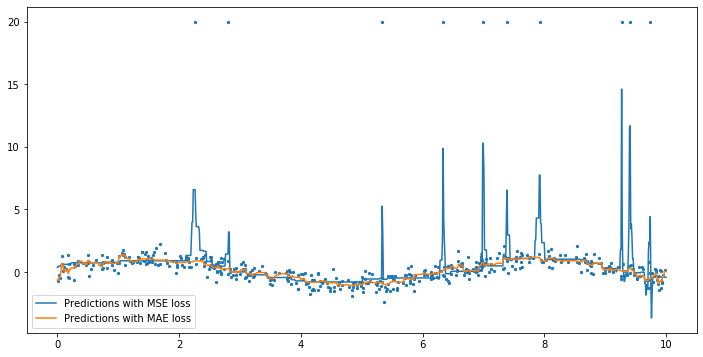

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
xpts = np.linspace(0, 10, 1000)
ax.scatter(xfake, yfake, s=5)
ax.plot(xpts,
        model_mse.predict(xpts[:, None]),
        label='Predictions with MSE loss')
ax.plot(xpts,
        model_mae.predict(xpts[:, None]),
        label='Predictions with MAE loss')
ax.legend()

In [23]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

class GradientBoostedRegressor:
    """A gradient boosting class
    """
    def __init__(self,
                 n_estimators=100, 
                 learning_rate=0.1,
                 subsample=0.5,
                 model=DecisionTreeRegressor,
                 loss='mse',
                 **kwargs):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.loss = loss
        self.model = model
        if loss not in ('mse', 'mae'):
            raise ValueError("Loss must be 'mse' or 'mae'")
        self.kwargs = kwargs
        self.estimators = []

    def fit(self, X, y):
        dummy = DummyRegressor()
        dummy.fit(X, y)
        self.estimators.append(dummy)
        
        # NB: it would be easier to call the predict method
        # of this model and avoid duplicated code, but that
        # adds a O(n**2) term in the number of estimators
        # because earlier estimators are called multiple
        # times during fitting
        prediction = np.zeros(len(y))
        for i in range(self.n_estimators):
            prediction = prediction + self.estimators[i].predict(X)
            
            if self.loss == 'mae':
                target = self.learning_rate * np.sign(y - prediction)
            else:
                target = self.learning_rate * (y - prediction)
            estimator = self.model(**self.kwargs)
            
            subsample_idx = np.random.choice(range(len(X)),
                                             round(self.subsample * len(X)),
                                             replace=False)
            estimator.fit(X[subsample_idx],
                          target[subsample_idx])
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.zeros((len(self.estimators),
                                len(X)))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)

        return predictions.sum(axis=0)

### Part 4: Other estimators

1. Add a parameter to `__init__` representing the underlying estimator. It should expect a class (with a default value of `DecisionTreeRegressor`). Save that as an attribute, and use that to create the estimators rather than `DecisionTreeRegressor`.

2. Test the results the code using `LinearRegression`. Compare the predictions to those from those with `LinearRegression` alone. Are the results what you expect? Why?

In [24]:
from sklearn.linear_model import LinearRegression
for n_estimators in [1, 5, 20, 100]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.1,
                                     model=LinearRegression)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("MSE for Linear Regression = {:3}: {}".format(n_estimators,
        ((y_test-lr_model.predict(X_test))**2).mean()))

MSE for n_estimators =   1: 74.41805655154876
MSE for n_estimators =   5: 43.34486919641221
MSE for n_estimators =  20: 22.73637874570571
MSE for n_estimators = 100: 22.72586080487477
MSE for Linear Regression = 100: 21.0634529896124


> The sum of predictions of linear-regression models is just another linear regression model, so we'd expect to converge toward the best linear-regression model. We're a bit off because of random noise in the subsampling.

> We seem to do better for a smaller number of estimators; this is equivalent to regularization.

3. Test the results with `KNeighborsRegressor`.  Compare the predictions to those from those with `KNeighborsRegressor` alone. Are the results what you expect? Why?

In [25]:
from sklearn.neighbors import KNeighborsRegressor
for n_estimators in [1, 5, 20, 100, 200, 500, 1000]:
    model = GradientBoostedRegressor(n_estimators=n_estimators,
                                     learning_rate=0.02,
                                     model=KNeighborsRegressor)
    model.fit(X_train, y_train)
    print("MSE for n_estimators = {:3}: {}".format(n_estimators,
        ((y_test-model.predict(X_test))**2).mean()))
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
print("MSE for KNN = {:3}: {}".format(n_estimators,
        ((y_test-knn_model.predict(X_test))**2).mean()))

MSE for n_estimators =   1: 83.95000152872278
MSE for n_estimators =   5: 77.66484732298713
MSE for n_estimators =  20: 61.647244664936295
MSE for n_estimators = 100: 38.23327452252657
MSE for n_estimators = 200: 37.72801433491426
MSE for n_estimators = 500: 56.29395641379696
MSE for n_estimators = 1000: 215.6750899313481
MSE for KNN = 1000: 41.53896692913385


> We did a bit better here, though it behaves very poorly with a large number of estimators. The overfitting causes large oscillations in the predictions. Here's what it looks like in one dimension:

In [26]:
feature = 6 # we'll just use one feature to visualize it
models_knn = {}
for n in (10, 30, 100, 300, 1000):
    models_knn[n] = GradientBoostedRegressor(n_estimators=n,
                                             learning_rate=0.01,
                                             model=KNeighborsRegressor)
    models_knn[n].fit(X_train[:, [feature]], y_train)

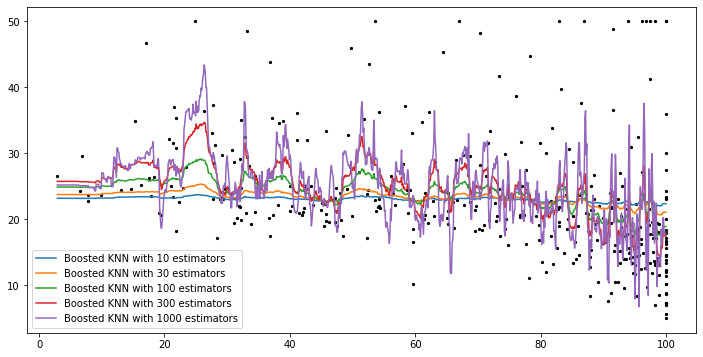

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
xpts = np.linspace(X_train[:, feature].min(), X_train[:, feature].max(), 1000)
ax.scatter(X_train[:, feature], y_train, s=5, color='k')
for n in models_knn:
    ax.plot(xpts,
            models_knn[n].predict(xpts[:, None]),
            label=f'Boosted KNN with {n} estimators')
ax.legend()

## Extra credit

### Part 5: Sklearn estimators

Look at he [documentation](https://scikit-learn.org/stable/developers/develop.html) for developing estimators for `sklearn`. Update your code to follow the guidelines.